Name: Rawat Padungkiettiwong

Student ID: 20200860

# 0. Import packages

In [1]:
import os

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm

# 1. Load Base Datasets

In [2]:
INPUT_DIR='/kaggle/input/kaist-ie343-2023-spring'

In [3]:
## Do not change this cell. 
## The reason for this is to prevent cheating using the original data from DACON. 
## If an assertion error occurs in that cell when TAs evaluate the submitted code of each student, it is considered cheating.

train = pd.read_csv(os.path.join(INPUT_DIR, 'train.csv'))
test = pd.read_csv(os.path.join(INPUT_DIR, 'test.csv'))
park = pd.read_csv(os.path.join(INPUT_DIR, 'park.csv'))
dcc = pd.read_csv(os.path.join(INPUT_DIR, 'day_care_center.csv'))

assert train.shape[0] == 329690 and train.shape[1] == 13, 'Do not change the format of the input data.'
assert test.shape[0] == 85097 and test.shape[1] == 12, 'Do not change the format of the input data.'
assert park.shape[0] == 1359 and park.shape[1] == 7, 'Do not change the format of the input data.'
assert dcc.shape[0] == 7373 and dcc.shape[1] == 10, 'Do not change the format of the input data.'

In [4]:
print(train.shape, test.shape, park.shape, dcc.shape)

(329690, 13) (85097, 12) (1359, 7) (7373, 10)


# 2. Load additional dataset
- You can use any additional data source, **excluding the original dataset from [DACON](https://dacon.io/competitions/open/21265/data)**

# 3. EDA and Preprocessing

## 3.1 EDA

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329690 entries, 0 to 329689
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              329690 non-null  int64  
 1   apartment_id       329690 non-null  int64  
 2   city               329690 non-null  object 
 3   dong               329690 non-null  int64  
 4   house_area         329690 non-null  float64
 5   built_year         329690 non-null  int64  
 6   floor              329690 non-null  int64  
 7   lat                329601 non-null  float64
 8   long               329601 non-null  float64
 9   transaction_year   329690 non-null  int64  
 10  transaction_month  329690 non-null  int64  
 11  transaction_day    329690 non-null  object 
 12  PRICE              329690 non-null  float64
dtypes: float64(4), int64(7), object(2)
memory usage: 32.7+ MB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85097 entries, 0 to 85096
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              85097 non-null  int64  
 1   apartment_id       85097 non-null  int64  
 2   city               85097 non-null  object 
 3   dong               85097 non-null  int64  
 4   house_area         85097 non-null  float64
 5   built_year         85097 non-null  int64  
 6   floor              85097 non-null  int64  
 7   lat                85084 non-null  float64
 8   long               85084 non-null  float64
 9   transaction_year   85097 non-null  int64  
 10  transaction_month  85097 non-null  int64  
 11  transaction_day    85097 non-null  object 
dtypes: float64(3), int64(7), object(2)
memory usage: 7.8+ MB


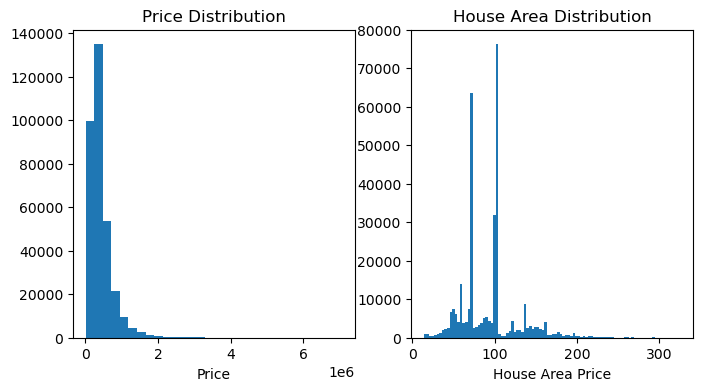

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

f, (ax1, ax2) = plt.subplots(1,2,figsize=(8,4))

ax1.hist(train['PRICE'], bins=30)
ax1.set_title('Price Distribution')
ax1.set_xlabel('Price')

ax2.hist(train['house_area'], bins=100)
ax2.set_title('House Area Distribution')
ax2.set_xlabel('House Area Price')

plt.show()

In [8]:
# Find the apartment ids that are either only in train or only in test

seoul_set = set(train['apartment_id'])
busan_set = set(test['apartment_id'])
diff_apartment_id = (seoul_set ^ busan_set)
print(len(diff_apartment_id)) # the number of apartment ids that are either only in train or only in test
print(diff_apartment_id) # apartment ids that are either only in train or only in test

# apartment ids in train but not in test
print('only in train:')
print([d for d in set(train['apartment_id']) if d not in set(test['apartment_id'])])
# apartment ids in test but not in train
print('only in test:')
print([d for d in set(test['apartment_id']) if d not in set(train['apartment_id'])])

464
{1, 27, 38, 47, 61, 81, 92, 98, 100, 103, 104, 106, 119, 124, 125, 140, 156, 158, 163, 166, 170, 173, 182, 198, 222, 223, 226, 249, 253, 254, 269, 284, 291, 292, 293, 296, 298, 311, 318, 320, 325, 344, 354, 365, 373, 387, 393, 394, 402, 408, 410, 412, 422, 424, 440, 447, 465, 470, 476, 480, 485, 492, 497, 499, 509, 539, 544, 546, 553, 557, 559, 587, 615, 619, 635, 644, 648, 654, 655, 658, 672, 683, 684, 692, 694, 695, 705, 731, 734, 750, 762, 768, 769, 787, 793, 799, 800, 805, 808, 810, 819, 825, 864, 870, 871, 885, 893, 901, 906, 911, 937, 955, 1009, 1010, 1012, 1014, 1016, 1018, 1019, 1022, 1033, 1043, 1068, 1074, 1077, 1097, 1100, 1115, 1165, 1180, 1194, 1247, 1250, 1253, 1272, 1283, 1298, 1328, 1336, 1342, 1353, 1364, 1366, 1397, 1417, 1436, 1444, 1459, 1464, 1467, 1470, 1479, 1486, 1488, 1489, 1499, 1502, 1510, 1511, 1530, 1540, 1547, 1579, 1585, 1586, 1587, 1588, 1594, 1607, 1612, 1617, 1619, 1634, 1650, 1656, 1662, 1686, 1691, 1701, 1702, 1705, 1737, 1777, 1784, 1806, 1808, 

In [9]:
# Find the dongs that are either only in train or only in test

seoul_set = set(train['dong'])
busan_set = set(test['dong'])
diff_dong = (seoul_set ^ busan_set)
print(diff_dong) # dongs that are either only in train or only in test

# dongs in train but not in test
print('only in train:')
print([d for d in set(train['dong']) if d not in set(test['dong'])])
# dongs in test but not in train
print('only in test:')
print([d for d in set(test['dong']) if d not in set(train['dong'])])

{177}
only in train:
[177]
only in test:
[]


In [10]:
# Find the dong labels that are in both Seoul and Busan for each of train and test

dong_seoul_set_train = set(train.loc[train['city']=='seoul', 'dong'])
dong_busan_set_train = set(train.loc[train['city']=='busan', 'dong'])
same_dong_train = dong_seoul_set_train & dong_busan_set_train 
print(same_dong_train)

dong_seoul_set_test = set(test.loc[test['city']=='seoul', 'dong'])
dong_busan_set_test = set(test.loc[test['city']=='busan', 'dong'])
same_dong_test = dong_seoul_set_test & dong_busan_set_test
print(same_dong_test)

{120}
{120}


In [11]:
# Trend of the average price in each year: increase every year

train_transaction_year_price = train.groupby('transaction_year')['PRICE'].agg('mean')
train_transaction_year_price

transaction_year
2018    376279.168906
2019    382710.558311
2020    401518.870209
2021    432181.913400
2022    481308.249010
Name: PRICE, dtype: float64

## 3.2 Preprocessing

In [12]:
# same min,max dongs for train,test
for d in same_dong_train:
    train.loc[(train['city']=='seoul') & (train['dong']==d), 'dong'] = train['dong'].max() + 1
for d in same_dong_test:
    test.loc[(test['city']=='seoul') & (test['dong']==d), 'dong'] = test['dong'].max() + 1

dong_seoul_set = set(train.loc[train['city']=='seoul', 'dong'])
dong_busan_set = set(train.loc[train['city']=='busan', 'dong'])
same_dong = dong_seoul_set & dong_busan_set
print(same_dong)

set()


In [13]:
# make the ranked dong
dong_price = train.groupby('dong')['PRICE'].agg('mean').sort_values(ascending=False)

for i, d in tqdm(enumerate(list(dong_price.index)), total=len(dong_price)):
    train.loc[train['dong'] == d, 'new_dong'] = i
    test.loc[test['dong'] == d, 'new_dong'] = i
train = train.drop('dong', axis=1)
test = test.drop('dong', axis=1)
train = train.rename(columns={'new_dong':'dong'})
test = test.rename(columns={'new_dong':'dong'})

100%|██████████| 204/204 [00:00<00:00, 657.47it/s]


In [14]:
# make the ranked apartment_id
apartment_id_price = train.groupby('apartment_id')['PRICE'].agg('mean').sort_values(ascending=False)

test.loc[test['apartment_id'] == 4391, 'new_apartment_id'] = -1

for i, d in tqdm(enumerate(list(apartment_id_price.index)), total=len(apartment_id_price)):
    train.loc[train['apartment_id'] == d, 'new_apartment_id'] = i
    test.loc[test['apartment_id'] == d, 'new_apartment_id'] = i
train = train.drop('apartment_id', axis=1)
test = test.drop('apartment_id', axis=1)
train = train.rename(columns={'new_apartment_id':'apartment_id'})
test = test.rename(columns={'new_apartment_id':'apartment_id'})

test.loc[test['apartment_id'] == -1, 'apartment_id'] = test['apartment_id'].mean()

100%|██████████| 4419/4419 [00:06<00:00, 666.32it/s]


In [15]:
# fillna on 'lat' and 'long'
train = train.fillna(train.median())
test = test.fillna(test.median())

In [16]:
# reassigning the transaction_day of '21~someday'
train.loc[(train["transaction_day"] == '21~31')|(train["transaction_day"] == '21~28')|(train["transaction_day"] == '21~29'), "transaction_day"] = '21~30'
test.loc[(test["transaction_day"] == '21~31')|(test["transaction_day"] == '21~28')|(test["transaction_day"] == '21~29'), "transaction_day"] = '21~30'

train.loc[train['transaction_day'] == '1~10', 'transaction_day'] = 0
train.loc[train['transaction_day'] == '11~20', 'transaction_day'] = 1
train.loc[train['transaction_day'] == '21~30', 'transaction_day'] = 2

test.loc[test['transaction_day'] == '1~10', 'transaction_day'] = 0
test.loc[test['transaction_day'] == '11~20', 'transaction_day'] = 1
test.loc[test['transaction_day'] == '21~30', 'transaction_day'] = 2

# change the type object -> int64 on transaction_day
train['transaction_day'] = train['transaction_day'].astype('int64')
test['transaction_day'] = test['transaction_day'].astype('int64')

In [17]:
train.loc[train['city'] == 'busan', 'city'] = 0
train.loc[train['city'] == 'seoul', 'city'] = 1

test.loc[test['city'] == 'busan', 'city'] = 0
test.loc[test['city'] == 'seoul', 'city'] = 1

# change the type object -> int64 on city
train['city'] = train['city'].astype('int64')
test['city'] = test['city'].astype('int64')

In [18]:
# log transformation on PRICE
train['log_price'] = np.log1p(train['PRICE'])
real_price = train['PRICE']
train = train.drop('PRICE', axis=1)

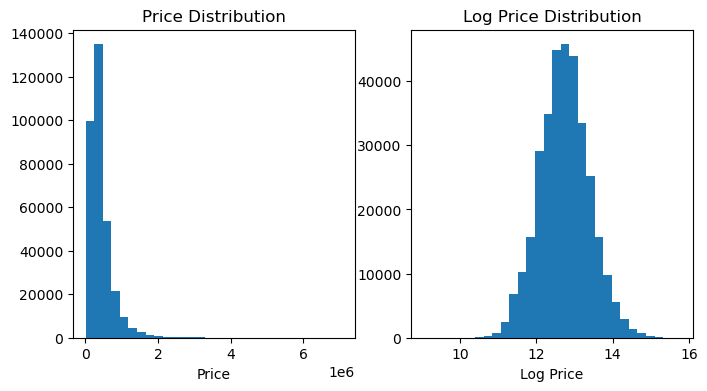

In [19]:
# compare the distribution between PRICE and log_price
f, (ax1, ax2) = plt.subplots(1,2,figsize=(8,4))

ax1.hist(real_price, bins=30)
ax1.set_title('Price Distribution')
ax1.set_xlabel('Price')

ax2.hist(train['log_price'], bins=30)
ax2.set_title('Log Price Distribution')
ax2.set_xlabel('Log Price')

plt.show()

In [20]:
# log transformation on house_area
train['log_area'] = np.log1p(train['house_area'])
test['log_area'] = np.log1p(test['house_area'])
house_area = train['house_area']
train = train.drop('house_area', axis=1)
test = test.drop('house_area', axis=1)

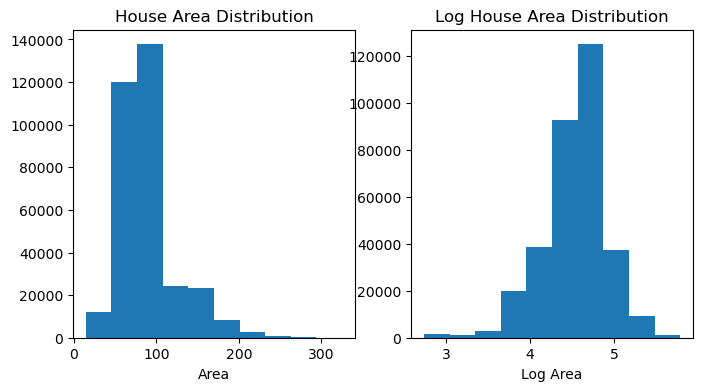

In [21]:
# compare the distribution between house_area and log_area
f, (ax1, ax2) = plt.subplots(1,2,figsize=(8,4))

ax1.hist(house_area, bins=10)
ax1.set_title('House Area Distribution')
ax1.set_xlabel('Area')

ax2.hist(train['log_area'], bins=10)
ax2.set_title('Log House Area Distribution')
ax2.set_xlabel('Log Area')

plt.show()

In [22]:
train = train.sort_values(by=['transaction_year', 'transaction_month', 'transaction_day'])

# 4. Modeling
- We use the most popular technique `KFold Cross Validation` and `Random Forest`.

In [23]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

train_cols = ['city', 'built_year', 'floor', 'transaction_year', 'dong', 'apartment_id', 'log_area']

train_train, train_valid = train[train['transaction_year'] != 2022], train[train['transaction_year'] == 2022]
X_train, y_train = train_train[train_cols], train_train['log_price']
X_valid, y_valid = train_valid[train_cols], train_valid['log_price']

feature_importance = []
val_accs = []
test_pred = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)        
for i, (tr_index, val_index) in enumerate(kf.split(X_valid)):
    tr_x, tr_y = X_valid.iloc[tr_index], y_valid.iloc[tr_index]
    val_x, val_y = X_valid.iloc[val_index], y_valid.iloc[val_index]
    new_X_train = pd.concat([X_train, tr_x])
    new_y_train = pd.concat([y_train, tr_y])
    test_x = test[train_cols]
    model = RandomForestRegressor(n_estimators=100, max_features='sqrt')
    model.fit(new_X_train, new_y_train)    

    pred_val = model.predict(val_x)
    test_pred.append(np.expm1(model.predict(test_x)))
    rf_acc = mean_absolute_error(np.expm1(val_y), np.expm1(pred_val))
    val_accs.append(rf_acc)
    feature_importance.append(model.feature_importances_)
    
    print(f'Fold{i}: RF MAE {rf_acc:.4f}')
print(f'Average RF MAE {np.mean(val_accs):.4f}')

Fold0: RF MAE 27548.1588
Fold1: RF MAE 27286.3033
Fold2: RF MAE 26447.8682
Fold3: RF MAE 26472.9495
Fold4: RF MAE 26835.4280
Average RF MAE 26918.1415


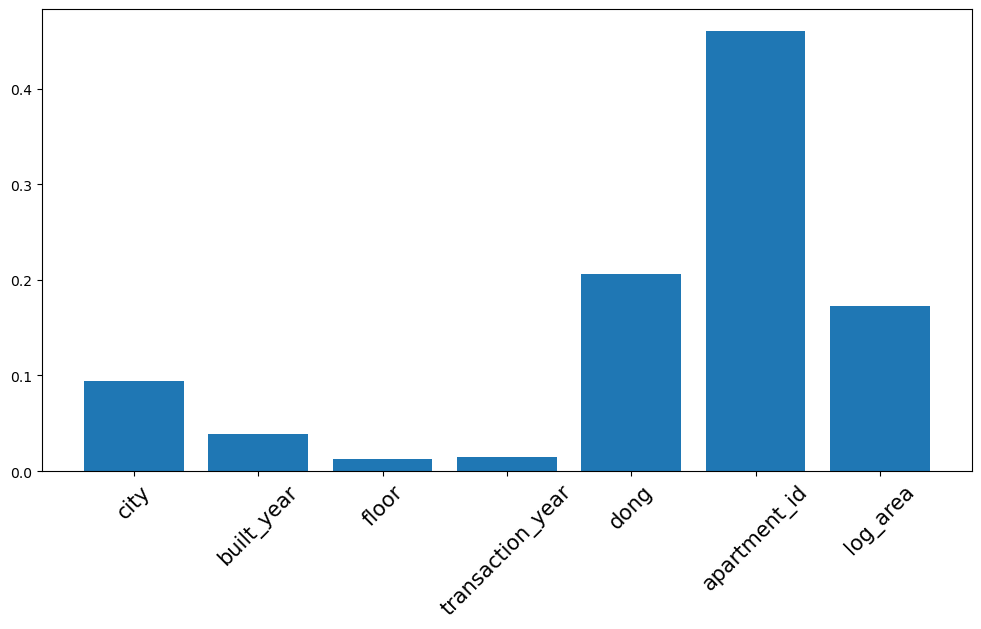

In [24]:
# illustrate the feature importance 
plt.figure(figsize=(12,6))
plt.bar(x=train_cols, height=np.mean(feature_importance, axis=0))
plt.xticks(fontsize=15, rotation=45)
plt.show()

# 5. Make submission

In [25]:
pred_test = np.mean(test_pred, axis=0) * 1.10

In [26]:
pd.DataFrame({'index':test['index'].values, 'PRICE':pred_test}).to_csv('20200860_Rawat_kaggle.csv', index=False)